<a href="https://colab.research.google.com/github/samindelhi/CNN-Exercises/blob/main/ResNet_Transfer_Learning_RockScissorsPaper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ResNet Transfer Learning with Rock-Paper-Scissors Dataset

This notebook demonstrates transfer learning using ResNet50v2 on the Rock-Paper-Scissors dataset from TensorFlow Datasets.


In [10]:
# Step1: Install and Import Required Lib.
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt


In [11]:
# Step 2: Load the Dataset
(ds_train, ds_test), ds_info = tfds.load(
    'rock_paper_scissors',
    split=['train','test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True)

print(ds_info)

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    full_name='rock_paper_scissors/3.0.0',
    description="""
    Images of hands playing rock, paper, scissor game.
    """,
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    data_dir='/root/tensorflow_datasets/rock_paper_scissors/3.0.0',
    file_format=tfrecord,
    download_size=219.53 MiB,
    dataset_size=219.23 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'test': <SplitInfo num_examples=372, num_shards=1>,
        'train': <SplitInfo num_examples=2520, num_shards=2>,
    },
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock

In [12]:
# Step3: Normalize and Batch the Data.
def normalize_img(image, label):
  return tf.cast(image, tf.float32) / 255.0, label

batch_size=64

ds_train = ds_train.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache().shuffle(1000).batch(batch_size).prefetch(tf.data.AUTOTUNE)

ds_test = ds_test.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.cache().batch(batch_size).prefetch(tf.data.AUTOTUNE)


In [13]:
#Step 4: Define the Transfer Learning Model.
base_model = tf.keras.applications.ResNet50V2(
    input_shape=(300,300,3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False

model = tf.keras.Sequential([
    tf.keras.layers.Resizing(300,300),
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resizing_1 (Resizing)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50v2 (Functional)         │ (None, 10, 10, 2048)   │    23,564,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ ?                      │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,564,800 (89.89 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,564,800 (89.89 MB)

In [14]:
# Step 5: Train the Model
history = model.fit(
    ds_train, validation_data=ds_test,
    epochs=10
)



Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 33s 578ms/step - accuracy: 0.7208 - loss: 0.7962 - val_accuracy: 0.7796 - val_loss: 0.5230
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 303ms/step - accuracy: 0.9895 - loss: 0.1885 - val_accuracy: 0.8011 - val_loss: 0.4032
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 306ms/step - accuracy: 0.9970 - loss: 0.0972 - val_accuracy: 0.7903 - val_loss: 0.4262
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 309ms/step - accuracy: 1.0000 - loss: 0.0672 - val_accuracy: 0.7823 - val_loss: 0.4674
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 304ms/step - accuracy: 1.0000 - loss: 0.0477 - val_accuracy: 0.7930 - val_loss: 0.4209
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 296ms/step - accuracy: 1.0000 - loss: 0.0381 - val_accuracy: 0.7876 - val_loss: 0.4373
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 297ms/step - accuracy: 1.0000 - loss: 0.0309 - val_accuracy: 0.7849 - val_loss: 0.4558
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 295ms/step - accuracy: 1.0000 - loss: 0.0247 - val_accu

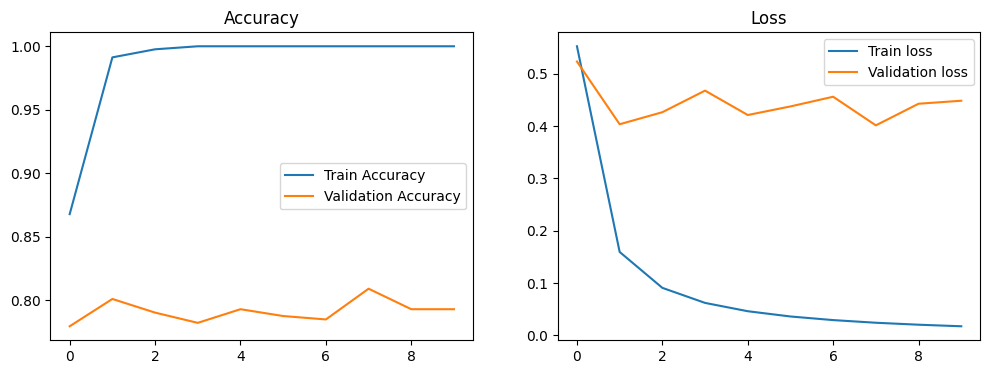

In [15]:
# Step6: Visualize Training Results.
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.title('Loss')

plt.show()

In [16]:
# Step 7: Evaluate on Test Set
test_loss, test_acc= model.evaluate(ds_test)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 252ms/step - accuracy: 0.8014 - loss: 0.4409
Test Accuracy: 0.7930, Test Loss: 0.4481


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


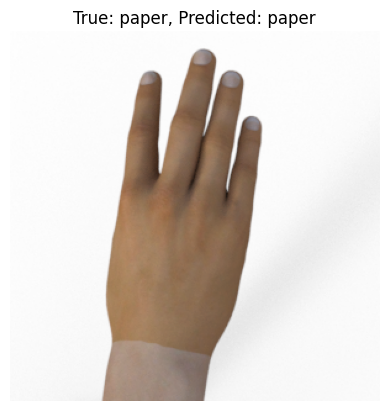

In [23]:
# Step 8: Inference on a Random Test Image
import random
import tensorflow_datasets as tfds

# Load test data again without batching
raw_test_ds = tfds.load('rock_paper_scissors', split='test', as_supervised=True)

# Pick a random test sample.
sample_list = list(raw_test_ds)
sample_image, sample_label = random.choice(sample_list)

#Preprocess image
input_image=  tf.image.resize(sample_image, (300,300)) / 255.0
input_image = tf.expand_dims(input_image, axis=0) # Add batch dimension

# Predict
pred = model.predict(input_image)
predicted_class = tf.argmax(pred[0]).numpy()

# Class labels
class_names= ds_info.features['label'].names

# Display
plt.imshow(sample_image)
plt.title(f"True: {class_names[sample_label]}, Predicted: {class_names[predicted_class]}")
plt.axis('off')
plt.show()